In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_data_points = 500

def create_data(num_data_points):
    x = np.random.rand(num_data_points)
    y_p = np.random.rand(num_data_points)

    X = np.array([(x[i], y_p[i]) for i in range(num_data_points)])
    y = []
    for index in range(num_data_points):
        if y_p[index] > 3*(x[index]-0.5)**2 + 0.2:# and y_p[index] < 3*(x[index]-0.5)**2 + 0.55:
            y.append([1])
        else:
            y.append([0])

    y=np.array(y)
    
    Z = np.concatenate((X,y),1)
    return Z

Z = create_data(num_data_points)

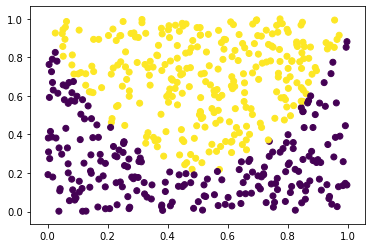

In [3]:
X = Z[:,:-1]
y = Z[:,-1]
y = y.reshape(-1,1)

c = y.T[0]
#c = np.where(c==0, 'red', c)
#c = np.where(c=='1', 'blue', c)
plt.scatter(*zip(*X), c=c)
plt.show()

In [4]:
class node_class(object):
    def __init__(self, input_dim, learning_rate=0.1):
        #An array of weights, an additional weight is added for the dummy input `a_o = 1`
        self.W = np.random.rand(int(input_dim+1))
        self.learning_rate = learning_rate
        
    def sigmoid_activation(self, t):
        self.final_output = 1 / (1 + np.exp(-t))
        return self.final_output
    
    def input_function(self, input_array):
        self.input_array = np.append(input_array,1)
        self.input_sum = np.sum(self.input_array * self.W)
        return self.input_sum
    
    def output(self, input_array):
        input_sum = self.input_function(input_array)
        return self.sigmoid_activation(input_sum)
    
    def sigmoid_der(self,t):
        return self.sigmoid_activation(t) * (1-self.sigmoid_activation(t))
        
    def calc_delta(self, actual_y=None, delta_j=None, final_layer=False):
        if final_layer:
            self.delta = self.sigmoid_der(self.input_sum)*(actual_y-self.final_output)
            return self.delta
        else:
            self.delta = self.sigmoid_der(self.input_sum) * np.sum(self.W * delta_j)
            return self.delta
            
    def update_weights(self):
        self.W = self.W + (self.learning_rate * self.input_array * self.delta)

In [5]:
class NN(object):
    def __init__(self, layers, learning_rate=0.1):
        self.layers_nodes = []
        for i, num_nodes in enumerate(layers):
            if i==0:
                input_dim = num_nodes
                continue
                
            dim = input_dim
            self.layers_nodes.append([])
            for j in range(num_nodes):
                n = node_class(dim, learning_rate=learning_rate)
                self.layers_nodes[i-1].append(n)
                
            input_dim = num_nodes
            
    def evaluate(self, predictions, y, categorical=True):
        if categorical:
            evals = []
            preds = np.array(predictions)
            preds = np.round(preds)
            
            for i in range(len(y)):
                if np.array_equal(preds[i], y[i]):
                    evals.append(1)
                else:
                    evals.append(0)
                    
            evals = np.array(evals)
            return evals.mean()
            
    def predict(self, X):
        preds = []
        for index, i in enumerate(X):
            outputs = [i]
            for h, layer in enumerate(self.layers_nodes):
                outputs.append([])
                for node in layer:
                    output = node.output(outputs[h])
                    outputs[h+1].append(output)
                    
            preds.append(outputs[-1])
                        
        return preds
            
    def train(self, Z, epochs):
        accs = []
        for j in range(epochs):
            np.random.shuffle(Z)
            
            X = Z[:,:-1]
            y = Z[:,-1]
            y = y.reshape(-1,1)
            
            predictions = self.predict(X)
            acc = self.evaluate(predictions,y)
            accs.append(acc)
            if j%100 == 0:
                print('epoch ', j)
                print('acc: ', acc)
            for index, i in enumerate(X):
                outputs = [i]
                for h, layer in enumerate(self.layers_nodes):
                    outputs.append([])
                    for node in layer:
                        output = node.output(outputs[h])
                        outputs[h+1].append(output)
                            
                for h, layer in enumerate(reversed(self.layers_nodes)):
                    for g, node in enumerate(layer):
                        if h == 0:
                            delta_j = node.calc_delta(actual_y=y[index][g], final_layer=True)
                        else:
                            delta_j = node.calc_delta(delta_j=delta_j)
                        node.update_weights()
        return accs

In [6]:
#Number of nodes for each layer
#     First number is the input dimension
#     Last number is the output dimension
layers = [2,18,1]
nn = NN(layers, learning_rate = 0.1)

In [7]:
Z = np.concatenate((X,y),1)
accuracies = nn.train(Z,500)

epoch  0
acc:  0.552
epoch  100
acc:  0.84
epoch  200
acc:  0.896
epoch  300
acc:  0.948
epoch  400
acc:  0.968


In [8]:
x = X[:3]
y_j = y[:3]
print(x)
print(y_j)

print(nn.predict(x))

np.random.shuffle(x)
print(x)

print(nn.predict(x))

[[0.66307831 0.44225602]
 [0.98454249 0.13442486]
 [0.51154439 0.71331896]]
[[1.]
 [0.]
 [1.]]
[[0.7275033973702931], [0.008962592845261536], [0.9984259262610211]]
[[0.98454249 0.13442486]
 [0.66307831 0.44225602]
 [0.51154439 0.71331896]]
[[0.008962592845261536], [0.7275033973702931], [0.9984259262610211]]


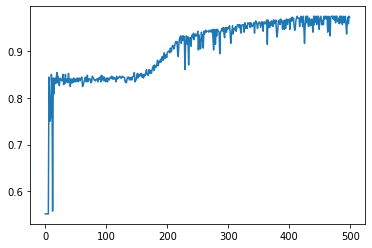

In [9]:
plt.plot(accuracies)

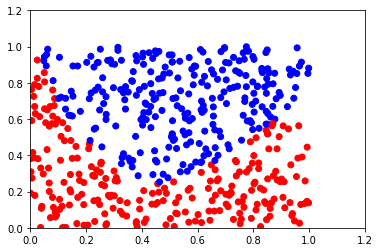

In [10]:
preds = nn.predict(X)
preds = np.round(preds)

c = np.array(preds).T
c = np.where(c==0, 'red', c)
c = np.where(c=='1.0', 'blue', c)
plt.scatter(*zip(*X), c=c[0])
plt.xlim(0,1.2)
plt.ylim(0,1.2)
#plt.axes().set_aspect('equal','datalim')
plt.show()

In [11]:
np.random.shuffle(Z)

test_X = Z[:,:-1]
test_y = Z[:,-1]
test_y = test_y.reshape(-1,1)
    
test_X = np.array(test_X)
test_y = np.array(test_y)

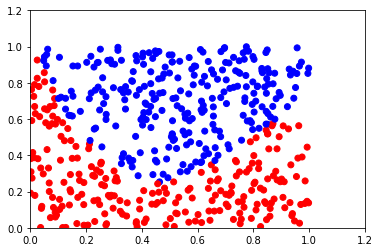

In [12]:
preds = nn.predict(test_X)
preds = np.round(preds)

c = np.array(preds).T
c = np.where(c==0, 'red', c)
c = np.where(c=='1.0', 'blue', c)
plt.scatter(*zip(*test_X), c=c[0])
plt.xlim(0,1.2)
plt.ylim(0,1.2)
#plt.axes().set_aspect('equal','datalim')
plt.show()

In [13]:
x_t = np.random.rand(num_data_points)
y_p_t = np.random.rand(num_data_points)

X_t = np.array([(x_t[i], y_p_t[i]) for i in range(num_data_points)])
y_t = []
for index in range(num_data_points):
    if y_p_t[index] > 3*(x_t[index]-0.5)**2 + 0.2:# and y_p[index] < 3*(x[index]-0.5)**2 + 0.55:
        y_t.append([1])
    else:
        y_t.append([0])

y_t=np.array(y_t)

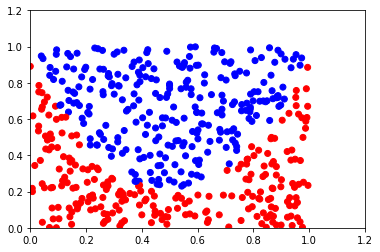

In [14]:
c = y_t.T[0]
c = np.where(c==0, 'red', c)
c = np.where(c=='1', 'blue', c)
plt.scatter(*zip(*X_t), c=c)
plt.xlim(0,1.2)
plt.ylim(0,1.2)
plt.show()

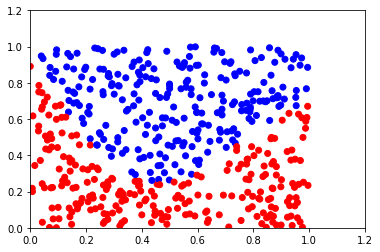

In [15]:
preds_t = nn.predict(X_t)
preds_t = np.round(preds_t)

c = np.array(preds_t).T
c = np.where(c==0, 'red', c)
c = np.where(c=='1.0', 'blue', c)
plt.scatter(*zip(*X_t), c=c[0])
plt.xlim(0,1.2)
plt.ylim(0,1.2)
#plt.axes().set_aspect('equal','datalim')
plt.show()